# Google Play Store Apps.

## About Dataset.


>### Context.

While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

>### Content.

Each app (row) has values for `catergory`, `rating`, `size`, and more.

>### Acknowledgements.

This information is scraped from the Google Play Store. This app information would not be available without it.

>### Inspiration.

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

>### Prediction Info.

Target columns are `Rating` and `Installs`

## Section 1: Data Cleaning.

>#### Importing Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, re
warnings.filterwarnings('ignore')
from datetime import datetime as dt
import statistics as stat

> #### i) Data Overview.

In [2]:
data = pd.read_csv('googleplaystore.csv')
data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5900,Cures A-Z,HEALTH_AND_FITNESS,4.0,265,4.1M,"100,000+",Free,0,Everyone,Health & Fitness,"August 13, 2015",2.1,3.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
8001,Canon CameraWindow,PHOTOGRAPHY,3.5,12204,6.8M,"1,000,000+",Free,0,Everyone,Photography,"March 14, 2017",1.5.2.21,2.3.3 and up
9625,JW Library,BOOKS_AND_REFERENCE,4.9,922752,Varies with device,"10,000,000+",Free,0,Everyone,Books & Reference,"June 15, 2018",Varies with device,Varies with device
10618,Results for FL Lottery (Florida),FAMILY,NaN,1,3.2M,100+,Free,0,Mature 17+,Entertainment,"November 2, 2017",2.27,4.0.3 and up
8116,Cymath - Math Problem Solver,FAMILY,4.5,10159,6.4M,"1,000,000+",Free,0,Everyone,Education,"April 13, 2018",2.17,4.1 and up
1865,Honkai Impact 3rd,GAME,4.7,59017,82M,"1,000,000+",Free,0,Teen,Action,"July 3, 2018",2.2.1,4.3 and up
9120,Devise Dz,FINANCE,4.0,26,3.6M,"1,000+",Free,0,Everyone,Finance,"May 29, 2017",1.0.0,4.0 and up
3225,Airport + Flight Tracker Radar,TRAVEL_AND_LOCAL,4.2,6762,8.5M,"1,000,000+",Free,0,Everyone,Travel & Local,"July 14, 2015",8.0,4.0 and up
701,English Communication - Learn English for Chin...,EDUCATION,4.7,2544,18M,"100,000+",Free,0,Everyone,Education,"December 29, 2017",3.1,4.0 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
data.describe(include = 'O')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


<b> Deductions</b>:

>Twelve features have their dtypes to be object, including `Price` and `Reviews` 😞, while `Rating` is float.

>There is a number of features with missing values. However, `Rating` (float dtype) has the highest.
    
>10841 rows are present with 13 columns.
    
>`App` is expected to be unique throughout, but no, it isn't. 9660 out of 10841 are unique. Others have exactly the same name. Is it possible to have two apps with exactly the same name? No. Thus, there is a possibility of having duplicate app info recorded in the data.
    
>There area a lot of irregular data entries - a whole lot! Imagine `Current Ver` having '<i>p</i>5.7.1' as an entry 😒. All these would be cleaned later.
    
>Most apps on Play Store (limited to our dataset) belong to the Family Category.
    
>Most apps on Play Store (limited to our dataset) are free to download - they are not paid for.

>#### ii) Handling Missing Values.

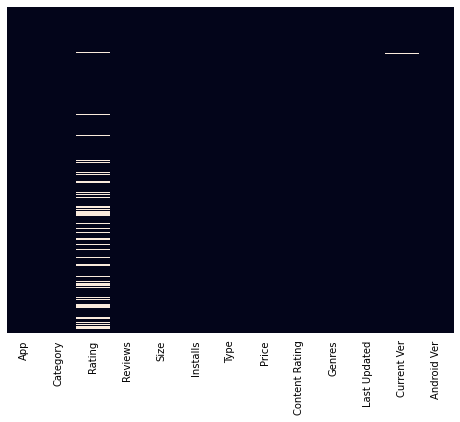

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.isnull(), cbar=False, ax=ax)
ax.set_yticks([]);
ax.tick_params(bottom='')

In [6]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

All object dtypes with missing values will be filled with the most occuring entry in their column (**mode**).

`Rating`, a float dtype will be filled with the **mean** of `Rating` column <u>for the gerne each missing value belong to.

In [7]:
missing_obj_dtype_cols = ['Content Rating', 'Type', 'Current Ver', 'Android Ver']

for i in missing_obj_dtype_cols:
    
    mode = stat.mode(data[i])
    
    data[i] = data[i].fillna(mode)

In [8]:
avg_per_gerne = round(data.groupby('Genres').mean(), 1)
fill_to = avg_per_gerne.to_dict()['Rating']
data.Rating.index = data.Genres.values
data['Rating'] = pd.Series(data['Rating'].fillna(fill_to).values)

In [9]:
data.isnull().sum()

App               0
Category          0
Rating            5
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

What's with these redundant five nans 😓?!

Let's have a look 💁🏻.

In [10]:
redundant_data = data[data.Rating.isnull()]
redundant_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
2111,Mcqueen Coloring pages,FAMILY,NaN,65,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
6829,Bu Hangi Firma?,FAMILY,NaN,8,26M,100+,Free,0,Everyone,Trivia;Education,"December 10, 2017",3.3.6z,4.0.3 and up
7629,Wuwu & Co.,FAMILY,NaN,9,77M,100+,Paid,$2.99,Everyone,Books & Reference;Creativity,"March 22, 2017",2.49,4.1 and up
9672,Masha and the Bear - Hair Salon and MakeUp Games,FAMILY,NaN,1,83M,100+,Paid,$2.49,Everyone,Role Playing;Education,"March 5, 2018",1.0.1,4.1 and up


*Their genres belong to either 'Art & Design;Action & Adventure', 'Trivia;Education', 'Books & Reference;Creativity' or 'Role Playing;Education'.*

Let's check for the values these keys belong to in the 'fill_to' dictionary.

In [11]:
fill_to.values()

dict_values([4.3, 4.3, 4.2, 4.4, 4.6, 4.1, 4.3, 4.3, 4.5, 4.4, nan, 4.4, 3.9, 4.2, 4.3, 4.3, 4.0, 4.3, 4.8, 4.3, nan, 4.2, 4.1, 4.1, 4.3, 4.4, 4.3, 4.2, 4.3, 4.5, 4.3, 4.3, 4.1, 4.2, 4.1, 4.8, 4.2, 4.2, 4.0, 4.3, 4.3, 4.4, 4.3, 4.4, 4.2, 4.4, 3.9, 4.2, 4.2, 4.0, 4.2, 4.2, 4.1, 4.2, 4.3, 4.5, 4.4, 4.2, 4.0, 4.4, 19.0, 4.1, 4.2, 4.3, 3.9, 4.7, 4.2, 4.2, 4.1, 4.3, 4.0, 4.1, 4.2, 4.2, 4.3, 4.5, 4.1, 4.3, 3.8, 3.9, 4.3, 4.3, 4.2, 4.2, 4.4, 4.3, 4.4, 4.4, 4.6, 4.2, 4.3, 4.5, 4.3, 4.3, 4.3, nan, 4.0, 4.3, 4.2, 4.4, 4.4, 4.4, 4.3, 4.2, 4.4, 4.2, 4.6, 4.4, 4.5, 4.0, 4.5, 4.1, 4.1, 4.0, nan, 4.1, 4.1, 4.0, 4.2, 4.4])

In [12]:
fill_to['Trivia;Education']

nan

Smiles.The average value of these `Genres` was nan all along.

These missing values were _replaced_ with a missing value! Hence, the missing value turned _redundant_.

There's nothing left to do than to drop these, or fill them with the overall mean 😏.

In [13]:
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())

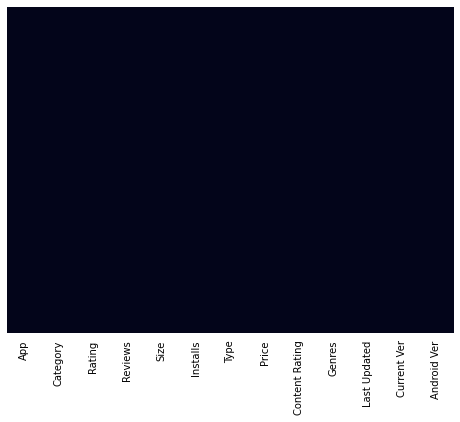

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.isnull(), cbar=False, ax=ax)
ax.set_yticks([]);
ax.tick_params(bottom='')

In [15]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

All done.

>#### iii) Cleaning Inconsistent Data Entries.

The dtypes of come columns would also be changed here.

In [16]:
data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9916,EU IP Codes,BOOKS_AND_REFERENCE,4.3,2,970k,100+,Free,0,Everyone,Books & Reference,"January 8, 2014",1.0.4,4.0 and up
5894,AZ Mobile Gizmo,BUSINESS,4.4,16,3.7M,"1,000+",Free,0,Everyone,Business,"April 2, 2018",3.4.4,4.2 and up
7630,Dots & Co: A Puzzle Adventure,FAMILY,4.5,81001,85M,"1,000,000+",Free,0,Everyone,Puzzle,"April 27, 2018",2.15.2,4.1 and up
3512,Dashlane Free Password Manager,PRODUCTIVITY,4.6,73695,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,5.0 and up
7040,BZ Berner Zeitung E-Paper,NEWS_AND_MAGAZINES,4.1,4,Varies with device,"1,000+",Free,0,Everyone,News & Magazines,"July 30, 2018",5.1.1,4.1 and up
959,Tubi TV - Free Movies & TV,ENTERTAINMENT,4.3,296771,11M,"10,000,000+",Free,0,Teen,Entertainment,"July 15, 2018",2.13.5,4.1 and up
5683,SMS Au revoir,FAMILY,4.1,17,1.7M,"5,000+",Free,0,Everyone,Entertainment,"January 15, 2018",2.0.0,4.0 and up
7366,usgang.ch,LIFESTYLE,3.7,492,Varies with device,"100,000+",Free,0,Everyone 10+,Lifestyle,"June 11, 2018",3.0.7,4.1 and up
6609,Blood Pressure Diary,FAMILY,4.6,47,3.3M,"5,000+",Free,0,Everyone,Simulation,"August 1, 2018",1.1,4.0.3 and up
3675,VLC for Android,VIDEO_PLAYERS,4.4,1032076,Varies with device,"100,000,000+",Free,0,Everyone,Video Players & Editors,"July 30, 2018",Varies with device,2.3 and up


`App`: Seems normal. Anyone could name their app anything.

`Category`: I'd love to remove these 'harmless' underscores. Besides, there could be meaningless or repeated categories. We'd check for this too.

`Rating`: Perfectly filled 😍!

`Reviews`: Hmmm, I'm unsure it's perfect. We'd try converting them to integers to be sure. Having a ValueError means the column needs cleaning.

`Size`: Nicely filled 😊. We'd still check to be sure.

`Installs`: Normal. We'd still check to be sure.

`Type`: Normal too. We'd still check to be sure.

`Price`: We'd remove the dollar sign, change its dtype to float and rename it.

`Content Rating`: I found something strange here. See below:

In [17]:
# Here's just one occurence.

data.iloc[141:142]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
141,Download free book with green book,BOOKS_AND_REFERENCE,4.6,4478,9.5M,"100,000+",Free,0,Everyone 10+,Books & Reference,"July 31, 2017",1.1,4.0 and up


'Everyone 10+'.

Downloading the game is restricted to those 10 or above. Why then, should Everyone be included? For all occurences similar to this, we'd remove Everyone from there. We'd also check other values to be sure.

`Genre`: Seems normal. We'd check to be sure.

`Last Updated`: This would be converted to datetime.

`Current Ver`: Looks nice. We'd still check to be sure.

`Android Ver`: Very perfect, but we'd still check to be sure 😏.

In [18]:
# Category.

data['Category'] = data['Category'].str.replace('_',' ')

data['Category'].unique()

array(['ART AND DESIGN', 'AUTO AND VEHICLES', 'BEAUTY',
       'BOOKS AND REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD AND DRINK', 'HEALTH AND FITNESS', 'HOUSE AND HOME',
       'LIBRARIES AND DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL AND LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO PLAYERS', 'NEWS AND MAGAZINES', 'MAPS AND NAVIGATION',
       '1.9'], dtype=object)

The last element in the output above seems off.

Let's peep at the whole data of rows with their category being '1.9'.

In [19]:
data[data['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


Wow!

<i><b>
    
1. Its categoty is numerical.

2. Its rating is above 5.

3. `Last Updated` is a datetype, but its has a perplexing entry itself.

4. Its gerne is 'February 11, 2018' - an odd value.
    
5. Its type is odd as well.
    
6. While most of the entries in `Reviews` are integers, this one chose to be 3.0M.
    
</i></b>

I better drop this entire row, or what do you think 😏?

In [20]:
data = data.drop(10472)

In [21]:
# Reviews
data['Reviews'] = data['Reviews'].astype('int')

No ValueError, nice 😍!

In [22]:
# Size
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

As expected, everything seems alright.

In [23]:
# Installs
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

As expected, everything seems alright here too.

In [24]:
# Type
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

Nice!

In [25]:
# Price
data['Price'] = data['Price'].str.replace('$', '')

data['Price'] = data['Price'].astype('float')

Nice!

In [26]:
# Coontent Rating
absurd = data[data['Content Rating'].str.contains('Everyone ')]
absurd
# Checks for those that had more than just 'Everyone'as an entry.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
22,Superheroes Wallpapers | 4K Backgrounds,ART AND DESIGN,4.7,7699,4.2M,"500,000+",Free,0.0,Everyone 10+,Art & Design,"July 12, 2018",2.2.6.2,4.0.3 and up
77,Police Detector (Speed Camera Radar),AUTO AND VEHICLES,4.3,3574,3.9M,"1,000,000+",Free,0.0,Everyone 10+,Auto & Vehicles,"July 4, 2018",1.6,4.0 and up
113,Wrinkles and rejuvenation,BEAUTY,4.3,182,5.7M,"100,000+",Free,0.0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
130,Recipes and tips for losing weight,BEAUTY,4.3,35,3.1M,"10,000+",Free,0.0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
141,Download free book with green book,BOOKS AND REFERENCE,4.6,4478,9.5M,"100,000+",Free,0.0,Everyone 10+,Books & Reference,"July 31, 2017",1.1,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10419,Fast Motorcycle Driver 2016,GAME,4.2,28151,49M,"1,000,000+",Free,0.0,Everyone 10+,Racing,"December 25, 2016",1.2,2.3.3 and up
10639,Florida Today,NEWS AND MAGAZINES,3.3,202,38M,"10,000+",Free,0.0,Everyone 10+,News & Magazines,"June 20, 2018",5.9.5,5.0 and up
10779,Fortune Quest: Savior,FAMILY,3.6,135,75M,"10,000+",Free,0.0,Everyone 10+,Role Playing,"June 1, 2018",1.022,4.4 and up
10784,Big Hunter,GAME,4.3,245455,84M,"10,000,000+",Free,0.0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up


In [27]:
absurd['Content Rating'].unique() # Checks if there are other categories of Content Rating. E.g 'Everyone 20+'

array(['Everyone 10+'], dtype=object)

WOW!

More than 400 rows are _'absurd'._

In [28]:
data['Content Rating'] = data['Content Rating'].str.replace('Everyone 10', '10')

data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
10+                 414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Oh, wow, 'Unrated' should also fall under 'Everyone', don't you think?

In [29]:
data['Content Rating'] = data['Content Rating'].str.replace('Unrated', 'Everyone')

data['Content Rating'].value_counts()

Everyone           8716
Teen               1208
Mature 17+          499
10+                 414
Adults only 18+       3
Name: Content Rating, dtype: int64

In [30]:
# Genres
data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

Seems so dirty 😒.

Let's have a closer peep.

In [31]:
data['Genres'].value_counts()[:20]

Tools                842
Entertainment        623
Education            549
Medical              463
Business             460
Productivity         424
Sports               398
Personalization      392
Communication        387
Lifestyle            381
Finance              366
Action               365
Health & Fitness     341
Photography          335
Social               295
News & Magazines     283
Shopping             260
Travel & Local       257
Dating               234
Books & Reference    231
Name: Genres, dtype: int64

Of 117 unique values, the first 20 seem ideal.

In [32]:
data['Genres'].value_counts()[20:40]

Arcade                     220
Simulation                 200
Casual                     193
Video Players & Editors    173
Puzzle                     140
Maps & Navigation          137
Food & Drink               127
Role Playing               109
Strategy                   107
Racing                      98
House & Home                88
Libraries & Demo            85
Auto & Vehicles             85
Weather                     82
Adventure                   75
Events                      64
Comics                      59
Art & Design                58
Beauty                      53
Education;Education         50
Name: Genres, dtype: int64

Yet nice.

In [33]:
data['Genres'].value_counts()[40:60]

Card                           48
Parenting                      46
Board                          44
Educational;Education          41
Casino                         39
Trivia                         38
Educational                    37
Casual;Pretend Play            31
Word                           29
Entertainment;Music & Video    27
Education;Pretend Play         23
Music                          22
Casual;Action & Adventure      21
Racing;Action & Adventure      20
Puzzle;Brain Games             19
Educational;Pretend Play       19
Action;Action & Adventure      17
Arcade;Action & Adventure      16
Board;Brain Games              15
Casual;Brain Games             13
Name: Genres, dtype: int64

Up till music, everything seems perfect.
'Puzzle;Brain Games' should not be a separate gerne, but should be merged with 'Puzzle'. The same goes for the rest, downwards.

In [34]:
data['Genres'].value_counts()[60:]

Adventure;Action & Adventure             13
Simulation;Action & Adventure            11
Entertainment;Brain Games                 8
Art & Design;Creativity                   7
Education;Creativity                      7
Casual;Creativity                         7
Role Playing;Action & Adventure           7
Parenting;Education                       7
Educational;Brain Games                   6
Education;Action & Adventure              6
Parenting;Music & Video                   6
Education;Brain Games                     5
Educational;Creativity                    5
Puzzle;Action & Adventure                 5
Role Playing;Pretend Play                 5
Education;Music & Video                   5
Educational;Action & Adventure            4
Simulation;Pretend Play                   4
Sports;Action & Adventure                 4
Entertainment;Creativity                  3
Video Players & Editors;Music & Video     3
Simulation;Education                      3
Music;Music & Video             

Trend:

The genre is the word just before the semi-colon. This can be extracted.

In [35]:
data['Genres'] = data['Genres'].str.replace(r';[a-z &]*','', flags = re.I)

Let's confirm what we've done.

In [36]:
data['Genres'].value_counts()

Tools                      843
Entertainment              667
Education                  645
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            392
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Books & Reference          234
Dating                     234
Simulation                 218
Video Players & Editors    178
Puzzle                     167
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   111
Adventure                   91
House & 

Educational should be merged with Education

Music & Audio should be merged with Music.

In [37]:
data['Genres'] = data['Genres'].str.replace('Educational','Education').str.replace('Music & Audio','Music')
data['Genres'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing',
       'Video Players & Editors', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'News & Magazines',
       'Maps & Navigation', 'Casino'], dtype=object)

Nice.

In [38]:
# Last Updated
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

There is an inconsistent data entry here. We'd deal with that later for some reason.

In [39]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

I can spot '4.4W and up' here. I believe the W there should be erased.

In [40]:
data['Android Ver'] = data['Android Ver'].str.replace('W','')

Confirm it's done: 

In [41]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '7.1 and up', '7.0 - 7.1.1', '8.0 and up',
       '5.0 - 8.0', '3.1 and up', '2.0.1 and up', '4.1 - 7.1.1',
       '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

**All done.**

> #### iv) Removing Outliers, if any.

This can only be done with numerical columns.

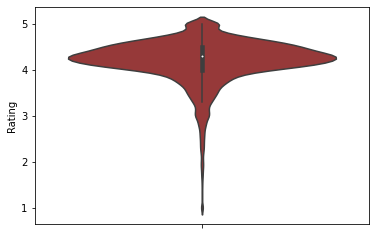

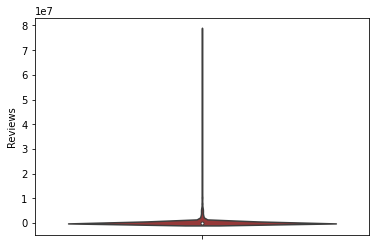

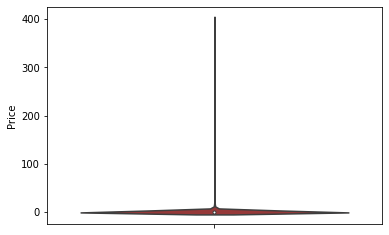

In [42]:
for i in data.select_dtypes(['int', 'float']):
    sns.violinplot(y = data[i], color = 'brown')
    plt.show()

They all seems to be without 'outliers' since they are all within resonable ranges.

**All done.**

>#### Further Data Cleaning.

App is expected to be unique throughout, but it isn't. We'd deal with that here.

In [43]:
# Before dropping
Apps = data['App'].value_counts()
Apps[Apps>1]

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: App, Length: 798, dtype: int64

Wow there are almost 800 apps repeated.

Let's check a few of them.

In [44]:
data[data.App=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0.0,10+,Adventure,2018-07-31,2.347.225742,4.1 and up


This is definitely a duplicate!

In [45]:
data[data.App=='ESPN']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0.0,10+,Sports,2018-07-19,Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0.0,10+,Sports,2018-07-19,Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0.0,10+,Sports,2018-07-19,Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0.0,10+,Sports,2018-07-19,Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0.0,10+,Sports,2018-07-19,Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0.0,10+,Sports,2018-07-19,Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081,Varies with device,"10,000,000+",Free,0.0,10+,Sports,2018-07-19,Varies with device,5.0 and up


This, as well.

In [46]:
data[data.App == 'Clover Dating App']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
495,Clover Dating App,DATING,4.1,11633,23M,"500,000+",Free,0.0,Mature 17+,Dating,2018-07-24,2.5.1,4.1 and up
550,Clover Dating App,DATING,4.1,11633,23M,"500,000+",Free,0.0,Mature 17+,Dating,2018-07-24,2.5.1,4.1 and up


This too.

It would not be too much if an assumption to say that those 798 apps were duplicated when gathering the data.

I'd, therefore, be dropping duplicates.

In [47]:
# Before dropping
data.shape

(10840, 13)

In [48]:
duplicate = data[data.App.duplicated()]
duplicate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up


In [49]:
data = data.drop(duplicate.index)

In [50]:
# After dropping
data.shape

(9659, 13)

In [51]:
# After dropping
Apps = data['App'].value_counts()
Apps[Apps>1]

Series([], Name: App, dtype: int64)

##### Data Cleaned.
I'd go ahead and save the cleaned version of it.

In [52]:
data.to_csv('CLEANED Playstore App Dataset.csv')

## Section 2: Exploratory Data Analysis.

Google Play Store has a whole lot of category. I'm curious to know which category most of the apps there fall to.

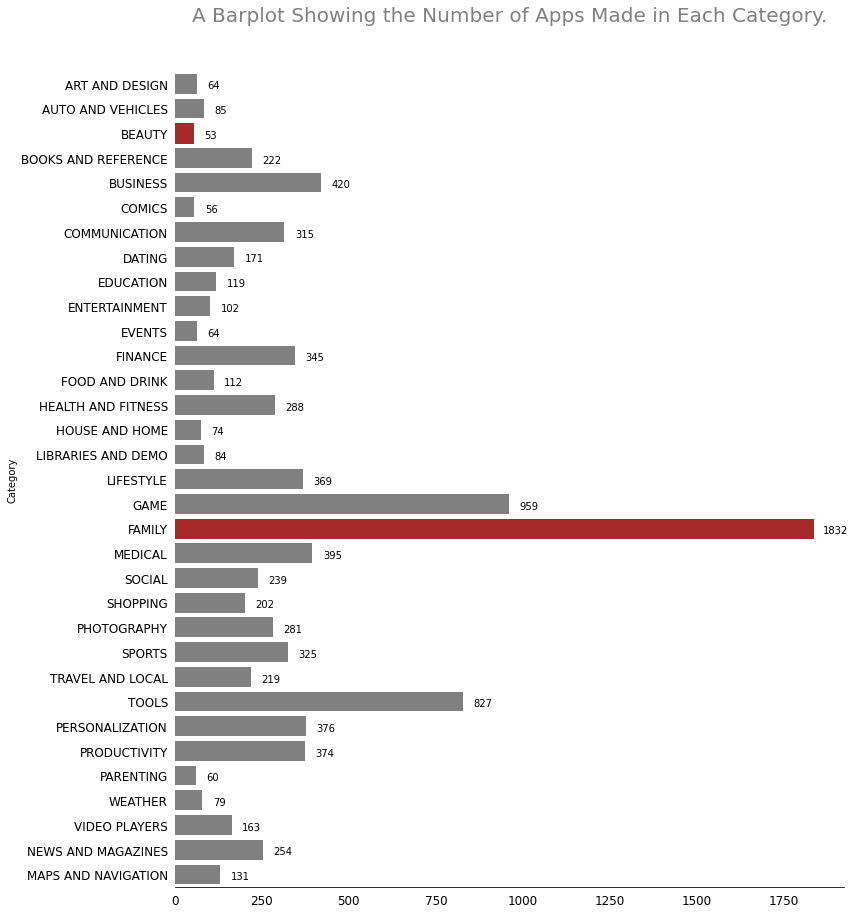

In [53]:
fig, ax = plt.subplots(figsize=(12,15))
plot = sns.countplot(y = data['Category'], ax=ax, color = 'grey')
for i in plot.patches:
    plot.annotate(i.get_width(), (i.get_width()+30, i.get_y()+0.6))
    if i.get_width()==data['Category'].value_counts().max():
        i.set_color('brown')
    if i.get_width()==data['Category'].value_counts().min():
        i.set_color('brown')
for i in ['left', 'right', 'top']:
    ax.spines[i].set_visible(False)
ax.tick_params(bottom = False, left = False, labelsize = 'large')
plt.xlabel('')
plt.title('A Barplot Showing the Number of Apps Made in Each Category.\n\n',fontsize = 20, color = 'grey');

<b>
    
<h3>Family!</h3>

Most of the Google Play Store Apps are of the Family category, while the least is Comics.

_Of the Family Category, which genre (sub-category) is the most famous?_

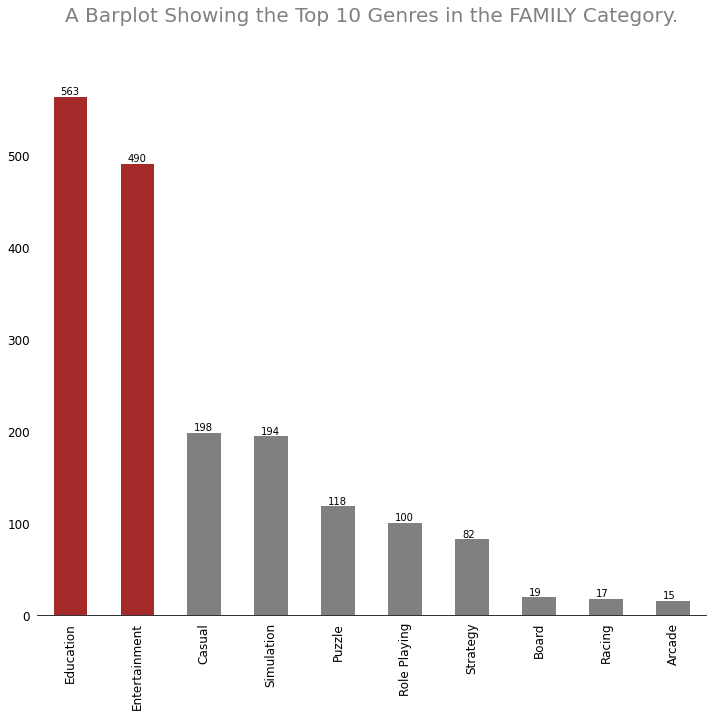

In [54]:
fig, ax = plt.subplots(figsize=(12,10))
Family_genre = data['Genres'][data['Category']=='FAMILY']

plott = Family_genre.value_counts()[:10].plot.bar(color=['brown','brown','grey','grey','grey','grey','grey','grey','grey','grey'])

for i in plott.patches:
    plott.annotate(i.get_height(), (i.get_x()+0.1, i.get_height()+3))

for i in ['left', 'right', 'top']:
    ax.spines[i].set_visible(False)

ax.tick_params(bottom = False, left = False, labelsize = 'large')

plt.xlabel('')
plt.title('A Barplot Showing the Top 10 Genres in the FAMILY Category.\n\n',fontsize = 20, color = 'grey');

<b>"Around the world today, a larger fraction of developers are developing apps in the Family Category to majorly educate or entertain them." - Our data just revealed this to us!

_Do they sell most of their apps or place them for free?_

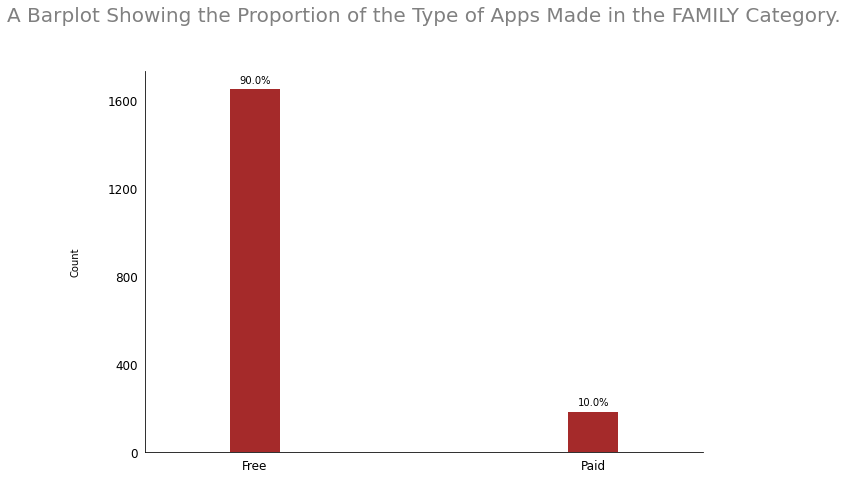

In [55]:
Family_Type = data['Type'][data['Category']=='FAMILY']
fig, ax = plt.subplots(figsize=(10,7))
plott = Family_Type.value_counts().plot.bar(color = 'brown', width = .15)

for i in ['right', 'top']:
    ax.spines[i].set_visible(False)

for i in plott.patches:
    plott.annotate('{}%'.format(round(i.get_height()/len(Family_Type)*100)), (i.get_x()+0.03, i.get_height()+30))
    
ax.tick_params(bottom = False, left = False, labelsize = 'large', rotation = 0)

plt.ylabel('Count\n\n')
plt.yticks([0,400,800,1200,1600])
plt.title('A Barplot Showing the Proportion of the Type of Apps Made in the FAMILY Category.\n\n',fontsize = 20, color = 'grey');

<b>A whole lot of the apps made under this 'popular' category are free! Infact, most apps from our data are free to download.

_Do they get a high rating for their apps, compared to other categories?_

In [56]:
Family_Rating = data['Rating'].groupby(data['Category']).mean().sort_values(ascending = False)
Family_Rating

Category
EVENTS                 4.425000
EDUCATION              4.363866
ART AND DESIGN         4.356106
BOOKS AND REFERENCE    4.334234
PERSONALIZATION        4.325532
BEAUTY                 4.283019
PARENTING              4.273333
SOCIAL                 4.255230
HEALTH AND FITNESS     4.251736
GAME                   4.245464
WEATHER                4.239241
SHOPPING               4.237624
SPORTS                 4.212923
AUTO AND VEHICLES      4.191765
PRODUCTIVITY           4.186631
LIBRARIES AND DEMO     4.183333
FAMILY                 4.183173
COMICS                 4.178571
FOOD AND DRINK         4.176786
MEDICAL                4.175443
PHOTOGRAPHY            4.160142
HOUSE AND HOME         4.158108
COMMUNICATION          4.136190
ENTERTAINMENT          4.135294
NEWS AND MAGAZINES     4.117323
FINANCE                4.113623
BUSINESS               4.099048
LIFESTYLE              4.094580
TRAVEL AND LOCAL       4.073973
VIDEO PLAYERS          4.049693
MAPS AND NAVIGATION    4.042748

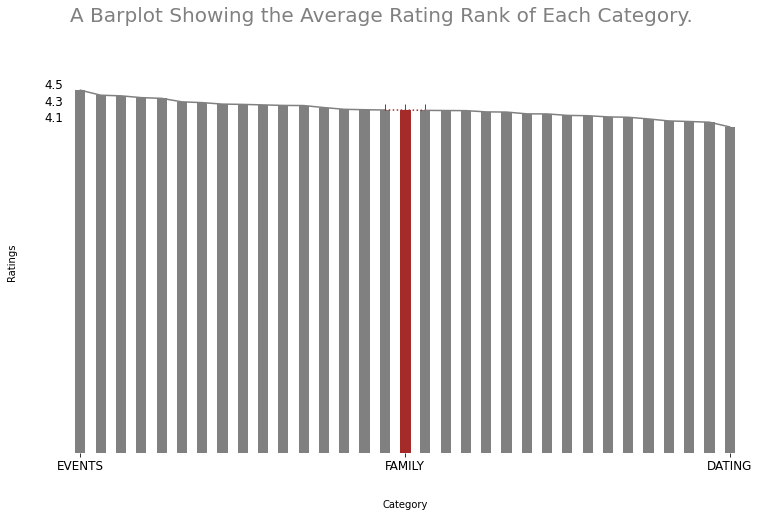

In [57]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(Family_Rating[:16], color = 'grey',)
ax.plot(Family_Rating[15:18], color = 'brown', alpha = 1, marker = 2, ls = ':')
ax.plot(Family_Rating[17:], color = 'grey')
plot = Family_Rating.plot.bar(color='grey')
for i in plot.patches:
    if i.get_height()==Family_Rating[16]:
        i.set_color('brown')
        
for i in ['top','right','left', 'bottom']:
    ax.spines[i].set_visible(False)
ax.tick_params(left = False, labelsize = 'large')
plt.xticks(['EVENTS','FAMILY','DATING'], rotation=0)
plt.xlabel('\n\nCategory')
plt.ylabel('Ratings\n\n')
plt.title('A Barplot Showing the Average Rating Rank of Each Category.\n\n',fontsize = 20, color = 'grey',loc = 'left')
plt.yticks([4.1,4.3,4.5]);

<b>Though the FAMILY Category has the highest number of apps, it has no important `Rating` rank among other categories.

<i>EVENTS and DATING have the highest and lowest ranks, respectively.

_Still on the FAMILY Category:_

_What is the minimum number of `Installs` they get? What's the maximum? What's the avarage, with respect to the other categories?_

In [58]:
data['Installs'].groupby(data['Category']).min().sort_values(ascending=False)

Category
ENTERTAINMENT          1,000,000+
WEATHER                    1,000+
BEAUTY                     1,000+
VIDEO PLAYERS              1,000+
COMICS                     1,000+
SHOPPING                   1,000+
EDUCATION                  1,000+
PHOTOGRAPHY                1,000+
PARENTING                  1,000+
MAPS AND NAVIGATION        1,000+
LIBRARIES AND DEMO         1,000+
HEALTH AND FITNESS             1+
TOOLS                          1+
SPORTS                         1+
AUTO AND VEHICLES              1+
HOUSE AND HOME                 1+
GAME                           1+
FOOD AND DRINK                 1+
BOOKS AND REFERENCE            1+
COMMUNICATION                  1+
DATING                         1+
EVENTS                         1+
PERSONALIZATION                0+
NEWS AND MAGAZINES             0+
PRODUCTIVITY                   0+
MEDICAL                        0+
SOCIAL                         0+
FINANCE                        0+
BUSINESS                       0+
TRAVE

In [59]:
data['Installs'].groupby(data['Category']).max().sort_values(ascending=False)

Category
PRODUCTIVITY           500,000,000+
VIDEO PLAYERS          500,000,000+
TOOLS                  500,000,000+
HEALTH AND FITNESS     500,000,000+
COMMUNICATION          500,000,000+
SOCIAL                 500,000,000+
GAME                   500,000,000+
NEWS AND MAGAZINES     500,000,000+
PERSONALIZATION            500,000+
MEDICAL                    500,000+
PARENTING                  500,000+
ART AND DESIGN             500,000+
PHOTOGRAPHY                500,000+
LIFESTYLE                  500,000+
SHOPPING                   500,000+
SPORTS                     500,000+
TRAVEL AND LOCAL           500,000+
MAPS AND NAVIGATION        500,000+
HOUSE AND HOME             500,000+
LIBRARIES AND DEMO         500,000+
AUTO AND VEHICLES          500,000+
FOOD AND DRINK             500,000+
FINANCE                    500,000+
FAMILY                     500,000+
EVENTS                     500,000+
ENTERTAINMENT              500,000+
EDUCATION                  500,000+
DATING             

Smiles.

The FAMILY Category ranks the lowest in both Series. Its maximum `Installs` value is so low! What's more shocking? There is even an app with zero installs and this is found in the FAMILY Category! I'd like to download that app, though 😂.

In [60]:
data[data['Installs']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.2,0,Varies with device,0,Free,0.0,10+,Strategy,2018-06-28,Varies with device,Varies with device


Command & Conquer: Rivals 😍. I'd drop a review as well 😇.

<i>Which apps in the Google Play Store are famous? Apps with the highest installs would reveal this to us.
    
Under which category do most of them fall?

In [61]:
famous_apps = data[data.Installs==data.Installs.max()]
famous_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0.0,Everyone,Communication,2018-07-18,Varies with device,Varies with device
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11M,"500,000,000+",Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,Varies with device,"500,000,000+",Free,0.0,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40M,"500,000,000+",Free,0.0,Teen,Communication,2018-08-02,12.8.5.1121,4.0 and up
403,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,Varies with device,"500,000,000+",Free,0.0,Everyone,Communication,2018-07-26,Varies with device,Varies with device
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up
1661,Temple Run 2,GAME,4.3,8118609,62M,"500,000,000+",Free,0.0,Everyone,Action,2018-07-05,1.49.1,4.0 and up
1662,Pou,GAME,4.3,10485308,24M,"500,000,000+",Free,0.0,Everyone,Casual,2018-05-25,1.4.77,4.0 and up
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,"500,000,000+",Free,0.0,Everyone,Casual,2018-07-19,4.8.0.132,4.1 and up
2546,Facebook Lite,SOCIAL,4.3,8606259,Varies with device,"500,000,000+",Free,0.0,Teen,Social,2018-08-01,Varies with device,Varies with device


**As expected, they are all free to download, and most of them do not limit any age group from downloading them.**

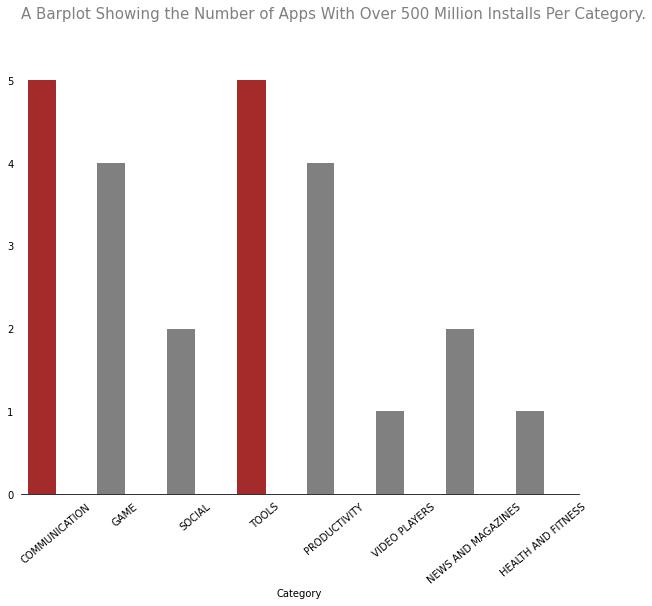

In [62]:
fig, ax = plt.subplots(figsize = (10,8))
plot = sns.countplot(famous_apps['Category'], color = 'grey')
for i in plot.patches:
    i.set_width(0.4)
    if i.get_height()==famous_apps['Category'].value_counts().max():
        i.set_color('brown')
for i in ['left', 'right', 'top']:
    ax.spines[i].set_visible(False)
ax.tick_params(bottom = False, left = False)
plt.xticks(rotation = 40)
plt.ylabel('')
plt.title('A Barplot Showing the Number of Apps With Over 500 Million Installs Per Category.\n\n',
          fontsize = 15, color = 'grey', loc = 'left');

<b>A whole lot of people have downloaded more apps in the COMMUNICATION and TOOLS Categories, than any other Category. W'd look deeper into the apps under these 'famous' Categories.

In [63]:
famous_apps[(famous_apps['Category']=='COMMUNICATION') | (famous_apps['Category']=='TOOLS')]['App'].values

array(['Viber Messenger', 'imo free video calls and chat',
       'Google Duo - High Quality Video Calls',
       'UC Browser - Fast Download Private & Secure',
       'LINE: Free Calls & Messages', 'Google Translate',
       'SHAREit - Transfer & Share', 'Gboard - the Google Keyboard',
       'Clean Master- Space Cleaner & Antivirus',
       'Security Master - Antivirus, VPN, AppLock, Booster'], dtype=object)

<b>These are popular apps indeed.

<i>Which app(s) in the Google Play Store are the least famous?

In [64]:
infamous_apps = data[data.Installs==data.Installs.min()]
infamous_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.2,0,Varies with device,0,Free,0.0,10+,Strategy,2018-06-28,Varies with device,Varies with device


<b>Though it is free to download, it still has no downloads.

<i>About how many years does this data span about? When is the latest date?

In [65]:
data['Last Updated'].min(), data['Last Updated'].max()

(Timestamp('2010-05-21 00:00:00'), Timestamp('2018-08-08 00:00:00'))

<b> `Last Updated` spans for about eight years, from the 21st of May 2010, to the 8th of August, 2018.
    
No app was updated beyond this range.

<i> The highest number of updates took place in what year? 

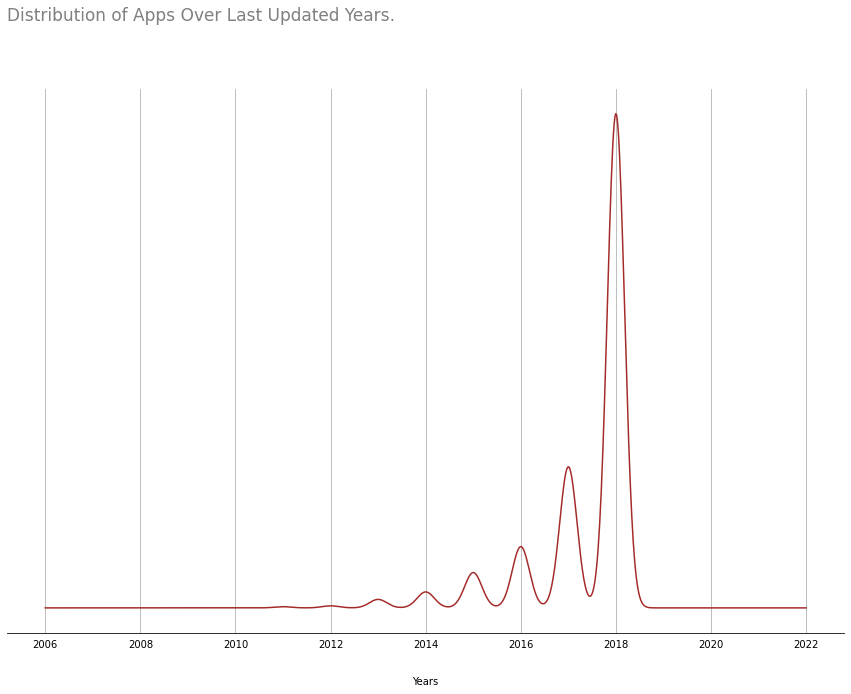

In [66]:
fig, ax = plt.subplots(figsize = (15,10))

data['Last Updated'].dt.year.plot(kind='kde', color = 'brown')

for i in ['left', 'right', 'top']:
    ax.spines[i].set_visible(False)

ax.tick_params(bottom = False, left = False, labelleft = '')

#plt.xlim([2010,2018])
plt.ylabel('')
plt.xlabel('\n\nYears')
plt.grid(axis = 'x')
plt.title('Distribution of Apps Over Last Updated Years.\n\n\n', loc = 'left', color = 'grey', fontsize = 17);

<b>Obviously, most apps were lastly updated in 2018 (July, precisely), than the previous years.

<i>Which month does updates occur more frequently? Least freqently?

The answer to the latter question would be deduced from years having complete months (Years excluding 2010 and 2018).

In [67]:
df = data[(data['Last Updated'].dt.year>2010) & (data['Last Updated'].dt.year<2018)]

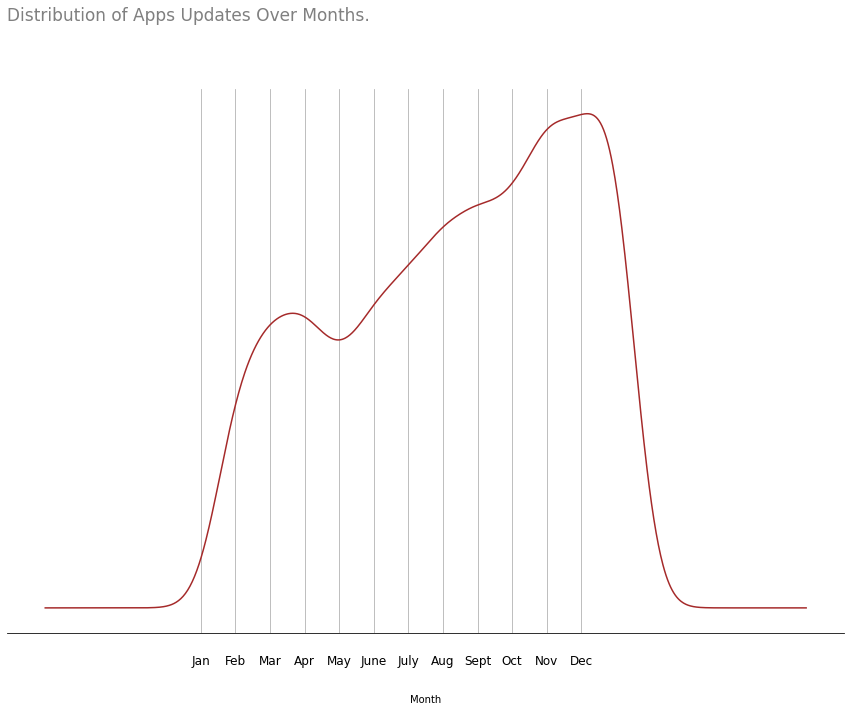

In [68]:
fig, ax = plt.subplots(figsize = (15,10))

a=df['Last Updated'].dt.month.plot(kind='kde', color = 'brown')

for i in ['left', 'right', 'top']:
    ax.spines[i].set_visible(False)

ax.tick_params(bottom = False, left = False, labelleft = '')

plt.xticks(np.arange(12), ['\nJan','\nFeb','\nMar','\nApr', '\nMay', '\nJune', 
                           '\nJuly', '\nAug', '\nSept','\nOct','\nNov','\nDec'], size = 'large')
plt.ylabel('')
plt.xlabel('\n\nMonth')
plt.grid(axis = 'x')
plt.title('Distribution of Apps Updates Over Months.\n\n\n', loc = 'left', color = 'grey', fontsize = 17);

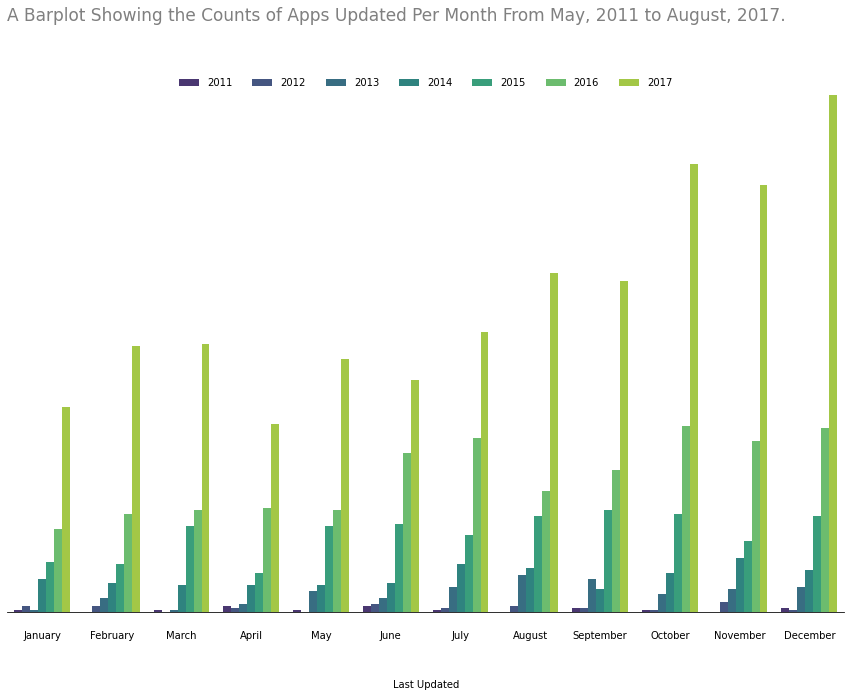

In [69]:
fig, ax = plt.subplots(figsize = (15,10))

plot = sns.countplot(df['Last Updated'].dt.month, hue = df['Last Updated'].dt.year, ax=ax, palette = 'viridis')

ax.legend(loc = 9, frameon = False, ncol = df['Last Updated'].dt.year.nunique())

for i in ['left', 'right', 'top']:
    ax.spines[i].set_visible(False)
    
ax.tick_params(bottom = False, left = False, labelleft = '')
   
plt.xticks(np.arange(12), ['\nJanuary','\nFebruary','\nMarch','\nApril', '\nMay', '\nJune', 
                           '\nJuly', '\nAugust', '\nSeptember','\nOctober','\nNovember','\nDecember'])



plt.ylabel('')
#plt.grid(axis = 'x')
plt.xlabel('\n\n\nLast Updated')
plt.title('A Barplot Showing the Counts of Apps Updated Per Month From May, 2011 to August, 2017.\n\n', loc = 'left', color = 'grey', fontsize = 17);

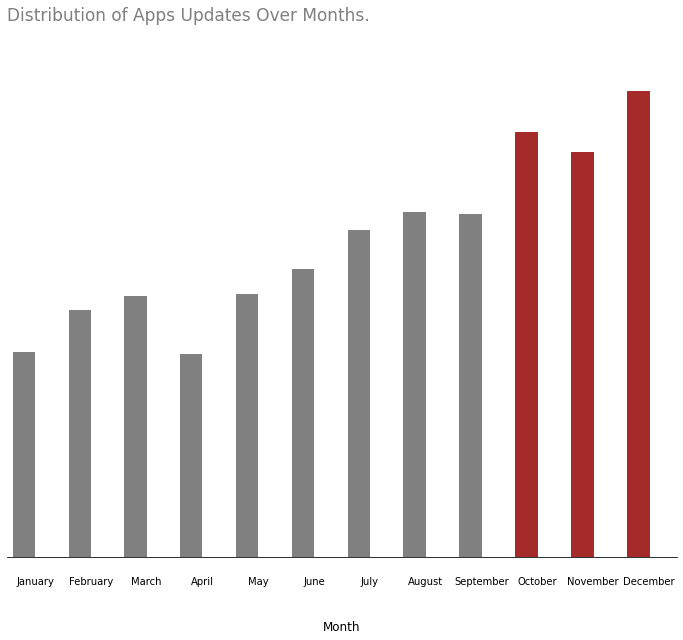

In [70]:
fig, ax = plt.subplots(figsize = (12,9))

plot = sns.countplot(df['Last Updated'].dt.month, color = 'grey')

for i in plot.patches:
    i.set_width(.4)
    if i in plot.patches[-3:]:
        i.set_color('brown')

for i in ['left', 'right', 'top']:
    ax.spines[i].set_visible(False)

ax.tick_params(bottom = False, left = False, labelleft = '')

plt.xticks(np.arange(12), ['\nJanuary','\nFebruary','\nMarch','\nApril', '\nMay', '\nJune', 
                           '\nJuly', '\nAugust', '\nSeptember','\nOctober','\nNovember','\nDecember'])
plt.ylabel('')
plt.xlabel('\n\nMonth', fontsize = 'large')
plt.title('Distribution of Apps Updates Over Months.\n\n', loc = 'left', color = 'grey', fontsize = 17);

<b>Deductively, most apps had their updates in December. Most developers want to make their app-updates before entering a new year.
    
<b>Also, towards the end of the year (from October), a large fraction of apps are updated.
    
What's so special about April? Nothing 😏. _Thus_ , few developers make their app-updates in April.

<i>If my app has a high number of reviews, will it be highly rated?

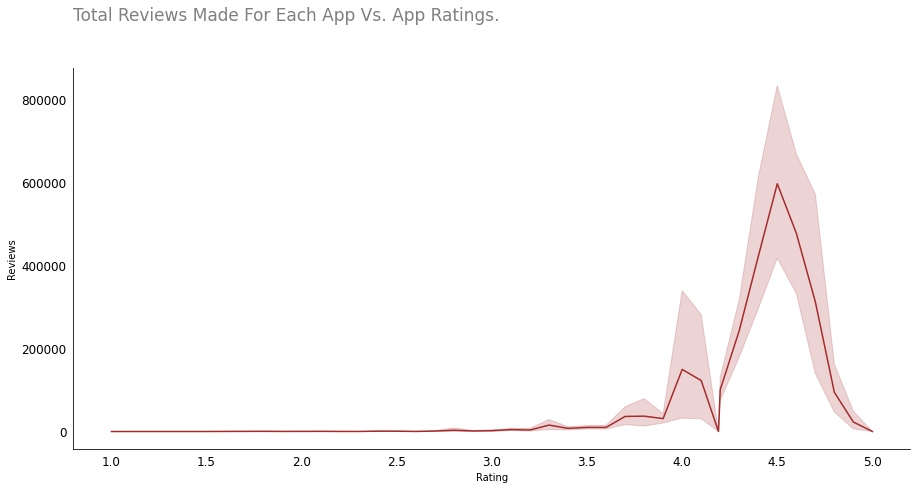

In [71]:
fig, ax = plt.subplots(figsize = (15,7))

plot = sns.lineplot(x = data['Rating'], y = data['Reviews'], color = 'brown', ax = ax);

for i in ['right', 'top']:
    ax.spines[i].set_visible(False)

ax.tick_params(bottom = False, left = False, labelsize = 'large')

plt.title('Total Reviews Made For Each App Vs. App Ratings.\n\n', loc = 'left', color = 'grey', fontsize = 17);

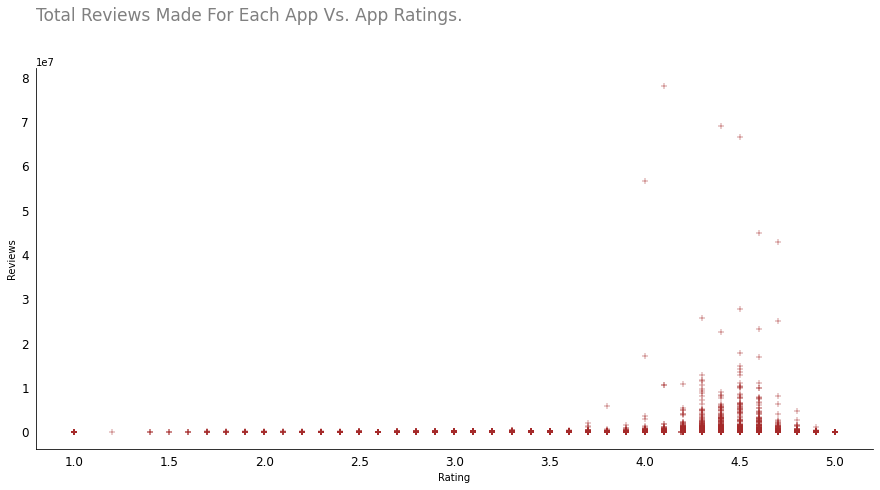

In [72]:
fig, ax = plt.subplots(figsize = (15,7))

plot = sns.scatterplot(x = 'Rating', y = 'Reviews', color = 'brown', marker = '+', data = data, ax = ax);

for i in ['right', 'top']:
    ax.spines[i].set_visible(False)

ax.tick_params(bottom = False, left = False, labelsize = 'large')

plt.title('Total Reviews Made For Each App Vs. App Ratings.\n\n', loc = 'left', color = 'grey', fontsize = 17);

<b>Yes, a highly rated app has a lot of people passing down their reviews.

The higher the `Rating`, the higher the `Reviews`. 

<i>Between free and paid apps, which one of them has a higher chance of being highly rated?

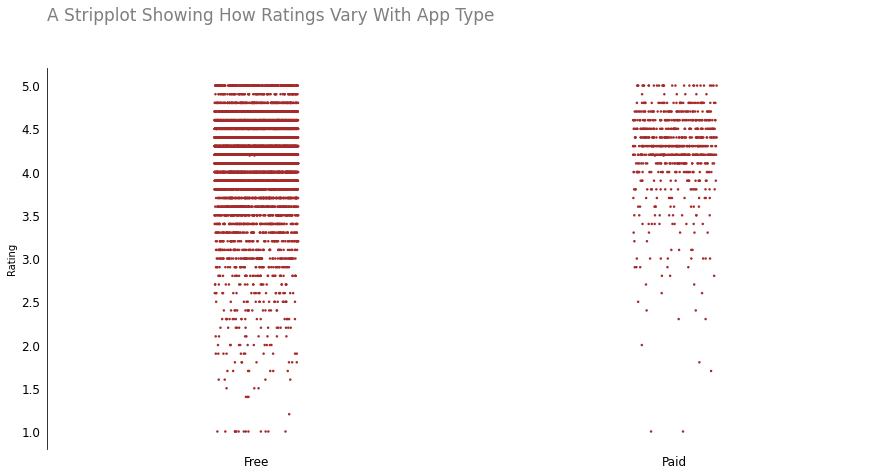

In [73]:
fig, ax = plt.subplots(figsize = (15,7))

sns.stripplot(y = 'Rating', x = 'Type', color = 'brown', marker = '.', data = data)

for i in ['right', 'top', 'bottom']:
    ax.spines[i].set_visible(False)

ax.tick_params(bottom = False, left = False, labelsize = 'large')

plt.xlabel('')

plt.title('A Stripplot Showing How Ratings Vary With App Type\n\n', loc = 'left', color = 'grey', fontsize = 17);

<b>Apps paid for rarely get a low rating (they don't disappoint).

`Content Rating` - What is the proportion of each group?

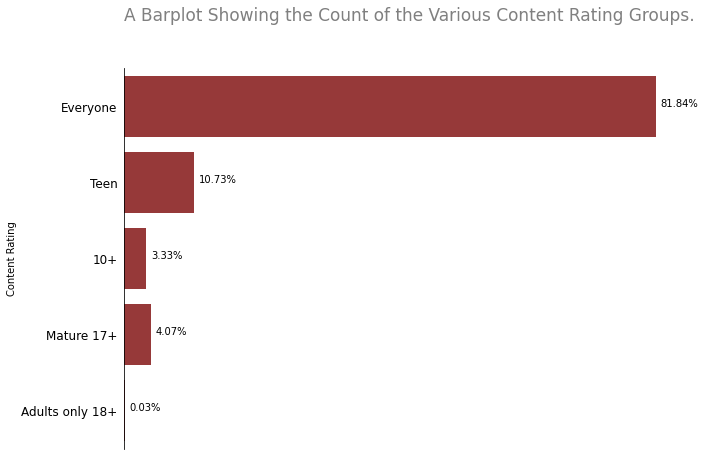

In [74]:
fig, ax = plt.subplots(figsize = (10,7))

plot = sns.countplot(y = data['Content Rating'], color = 'brown')

for i in plot.patches:
    text = i.get_width()*100/data.shape[0]
    plot.annotate('{:.2f}%'.format(text), (i.get_width()+70, i.get_y()+0.4))

for i in ['right', 'top', 'bottom']:
    ax.spines[i].set_visible(False)

ax.tick_params(bottom = False, left = False, labelsize = 'large', labelbottom = '')

plt.xlabel('')

plt.title('A Barplot Showing the Count of the Various Content Rating Groups.\n\n', 
          loc = 'left', color = 'grey', fontsize = 17);

<b>Most apps have no age group restriction. Anyone can download them.
    
However, a few apps are solely for adults. A closer peep, please.

In [75]:
data[data['Content Rating']=='Adults only 18+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4.9M,"500,000+",Free,0.0,Adults only 18+,Comics,2018-07-04,1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41M,"1,000,000+",Free,0.0,Adults only 18+,Sports,2018-07-24,3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,Varies with device,"500,000+",Free,0.0,Adults only 18+,Comics,2018-08-03,Varies with device,Varies with device


<b>These apps have an average high rating, are free to download, and are of two Genres - Comics and Sports.

<i>For apps with the
    
>1. maximum rating
    
>2. minimum rating,
    
let's give insights into their features.
    
Most of them fall under which `Category`?
    
Most of them are of which `Type`?

In [76]:
minimum = data[data.Rating==data.Rating.min()]

maximum = data[data.Rating==data.Rating.max()]

In [77]:
maximum.Category.value_counts()

FAMILY                 67
LIFESTYLE              29
MEDICAL                25
BUSINESS               18
TOOLS                  17
GAME                   12
HEALTH AND FITNESS     12
PERSONALIZATION        10
SOCIAL                  8
PRODUCTIVITY            8
FINANCE                 8
NEWS AND MAGAZINES      7
BOOKS AND REFERENCE     6
DATING                  6
SHOPPING                6
EVENTS                  6
PHOTOGRAPHY             6
COMMUNICATION           5
SPORTS                  4
TRAVEL AND LOCAL        3
COMICS                  2
FOOD AND DRINK          2
LIBRARIES AND DEMO      2
PARENTING               1
ART AND DESIGN          1
Name: Category, dtype: int64

In [78]:
minimum.Category.value_counts()

FAMILY           3
MEDICAL          3
TOOLS            3
FINANCE          2
DATING           1
GAME             1
PRODUCTIVITY     1
COMMUNICATION    1
BUSINESS         1
Name: Category, dtype: int64

<b>The highest rated apps, as well as the least rated apps are found mainly in the FAMILY Category and are definitely free to download.

<i>Moving on to `Size`.

In [79]:
data.Size.value_counts().head()

Varies with device    1227
11M                    182
12M                    181
14M                    177
13M                    177
Name: Size, dtype: int64

<b>Most of the sizes recorded are not definite. Hence, we cannot really work with this column as we ought to.
    
I'd create a temporal custom dataframe with rows having "Varies with device" as `Size` filtered out.

In [80]:
dataframe = data[data.Size!='Varies with device']
dataframe.Size.value_counts().head()

11M    182
12M    181
13M    177
14M    177
15M    163
Name: Size, dtype: int64

<b> Done. We can now work with this.

The target is to make `Size` column an integer type. This column should have megabyte as its unit.</b>
 
<b>First, 'M' (symbolizing megabyte) will be removed.
    
Second, those ending with 'k' (symbolizing kilobyte) will have their integer part divided by 1024 (1024Kb makes 1Mb)</b>
    
<b>Third, 'k' will be removed.
    
Lastly, the column would be converted to a float type and renamed.

In [81]:
def to_meg(x):
    if x[-1]=='k':
        return float(x[:-1])/1024
    else:
        return x
dataframe.Size = dataframe.Size.str.replace('M','').apply(to_meg).astype('float')
dataframe = dataframe.rename(columns = {'Size':'Size In Mb'})

In [82]:
dataframe['Size In Mb'].describe()

count    8432.000000
mean       20.394897
std        21.827898
min         0.008301
25%         4.600000
50%        12.000000
75%        28.000000
max       100.000000
Name: Size In Mb, dtype: float64

<b>Done.
    
The average size an app from Play Store has is about 20 Mb.

<i>Does the `Category` an app belong to affect how sized the app is? Which category has the least app size? Which one has the highest?

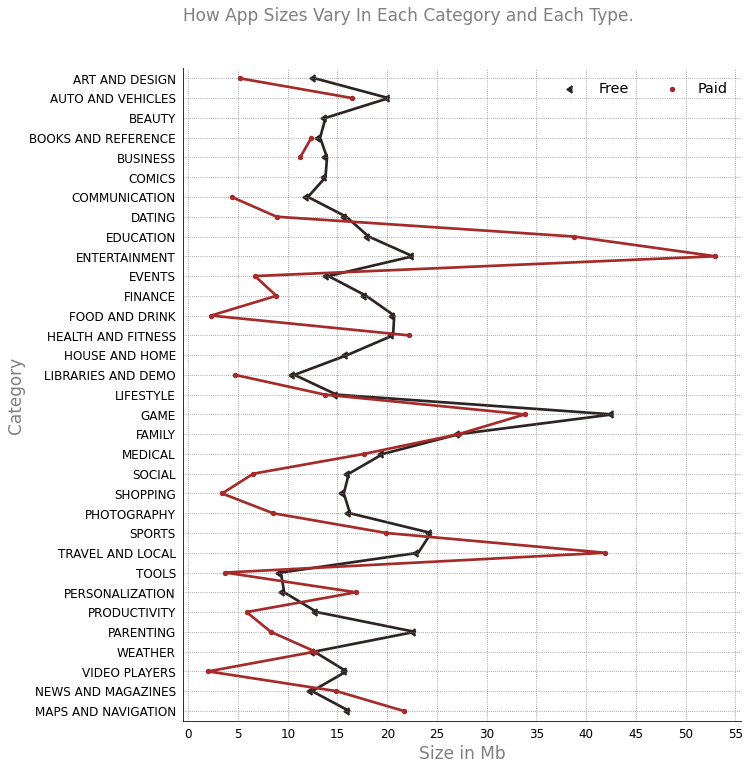

In [83]:
fig, ax = plt.subplots(figsize = (10,12))

sns.pointplot('Size In Mb', 'Category', data = dataframe, hue = 'Type', color = 'brown', 
              ci = None, markers = [8,'.'], ax = ax)

plt.legend(ncol = 2, frameon = False, fontsize = 'x-large')

for i in ['right', 'top']:
    ax.spines[i].set_visible(False)

ax.tick_params(bottom = False, left = False, labelsize = 'large')

plt.xlabel('Size in Mb', color = 'grey', fontsize = 17)
plt.ylabel('Category', color = 'grey', fontsize = 17)

plt.xticks(np.arange(0,56,5))

plt.grid(color = 'grey', ls = ':')

plt.title('How App Sizes Vary In Each Category and Each Type.\n\n', loc = 'left', color = 'grey', fontsize = 17);

<b>For Paid apps (brown colored line), two spikes are seen in the <U>ENTERTAINMENT</U> and <u>TRADE AND LOCAL</u> Categories with average sizes of about 53 Mb and 42 Mb respectively.
    
Free apps' (most apps fall under this type, denoted by the black colored line), however has a lower spike and this is found in the <u>GAME</u> Category. It has an average size of about 43 Mb.</b>
    
<i>Paid apps are usually larger in size.</i>
    
<b>Also, apps with a low relatively low sizes (less than 5 Mb) are found majorly in these categories: 
    
>ART AND DESIGN
    
>COMMUNICATION
    
>FOOD AND DRINK
    
>LIBRARIES AND DEMO
    
>SHOPPING
    
>TOOLS
    
>VIDEO PLAYERS

## Section 3: Predictive Modelling

<b>To choose a suitable model to train our data with, checking out for the correlation between these features is essential.

In [84]:
dataframe.corr()

,Rating,Reviews,Size In Mb,Price
Rating,1.000000,0.066669,0.058595,-0.019598
Reviews,0.066669,1.000000,0.179321,-0.008649
Size In Mb,0.058595,0.179321,1.000000,-0.022441
Price,-0.019598,-0.008649,-0.022441,1.000000


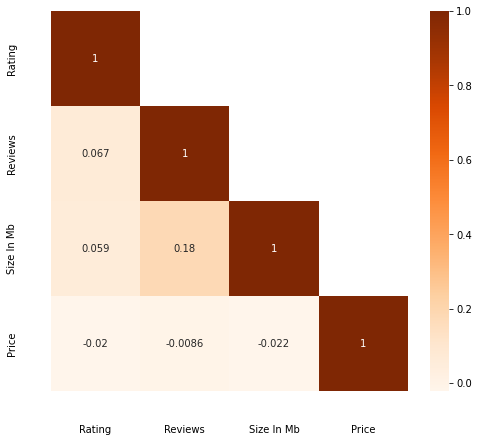

In [85]:
mask = np.zeros((4,4))
for i in range(3):
    mask[i+1:, i]=1
mask = mask.T

plt.figure(figsize = (8,7))
sns.heatmap(dataframe.corr(), mask = mask, annot = True, cmap = 'Oranges')
plt.tick_params(bottom = '', left = '', pad = 30)

<b>The heatmap from above makes it so obvious that the linearity between these continuous columns is so low. Hence, fitting a linear model is out of it.
    
Since one of the target features is continuous (`Rating`) and it has no co-linearity, fitting a Decision Tree Regressor would be the best.</b>
    
<b>`Installs`, the other target feature is categorical. I'd love to fit a Decision Tree Clsassifier among others.

In [86]:
#Importing libraries from scikit learn.

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score

>### Making a Classification Model.

Here, we're to predict how many installs an app will have, based on other features.

<b><i>Spltting the data into dependent (y) and independent (X) features.</b>
    
To determine which feature could affect `Installs`, we'd examine each of the features.

In [87]:
dataframe.sample(5)

,App,Category,Rating,Reviews,Size In Mb,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9528,Sanu Ek Pal Chain Song Videos - RAID Movie Songs,FAMILY,4.9,11,4.3,"5,000+",Free,0.0,Everyone,Entertainment,2018-03-08,1.2.8,4.0.3 and up
7747,Cypress College Library,BOOKS AND REFERENCE,4.3,0,2.1,100+,Free,0.0,Everyone,Books & Reference,2015-12-07,4.7.2,1.6 and up
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34,12.0,"5,000+",Free,0.0,Everyone,Comics,2018-07-31,1.0.5,5.0 and up
5375,I Am Wizard,FAMILY,4.2,1493,57.0,"100,000+",Free,0.0,Everyone,Strategy,2018-04-01,1.0.9,4.1 and up
9751,"ER Emergency Hospital - Brain, Knee, Eye Surgery",FAMILY,3.8,25,41.0,"1,000+",Free,0.0,Teen,Education,2017-07-21,1.1,2.3 and up


>#### Breakdown:   
<b>
  
`App`: The name of the app definitely has no impact on if I'd get 20 or 200000 Installs.
    
`Category`: The number of Installs could depend on the category an app is.
    
`Rating`: A highly installed app could attract high ratings.
    
`Reviews`: Ealier on (in the EDA section), we saw that a highly rated app attracts more reviews. Thus, an app is meant to have a lot of users (pontential reviewers) because it has a high number of reviews.
    
`Size`: `Installs` would definitely depend on the app size. 'Varies with device' as an entry would have no certain impact on `Installs`, thus would be dropped ('dataframe' would be used for the data modelling rather than 'data', for obvious reasons).
    
`Type`: A free app could have more users installing them.
    
`Price`: The same thing goes for this feature.
    
`Content Rating`: This, as well.
       
`Last Updated`: The number of installs cannot be predicted from when last an app was updated.
    
`Current Ver`: Likewise this.
    
`Android Ver`: This could affect `Installs`. If my android version is not compatible with the app's required version, I would decide not to download it. I'd rather go with an alternative app.

In [88]:
X = dataframe.drop(['App', 'Last Updated', 'Current Ver'], axis = 1)

y = dataframe['Installs']

In [89]:
Encoder = LabelEncoder()
for i in X.select_dtypes('O'):
    X[i] = Encoder.fit_transform(X[i])

<i>Splitting:

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

<i>Fitting:

In [91]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<i>Predicting:

In [92]:
y_pred = model.predict(X_test)

<i> Model Evaluation:

In [93]:
accuracy_score(y_test, y_pred)

1.0

<b>Smiles.

>### Making a Regression Model.

Here, we're to predict what the rating of an app will be, based on other features.

>#### Breakdown:   
<b>
  
`App`: The name of the app definitely has no impact on if I'd get a star or 5 stars.
    
`Category`: The rating could depend on the category an app is.
    
`Installs`: A highly installed app could attract high ratings.
    
`Reviews`: Everone who drops a review drops a rating.
    
`Size`: `Rating` would definitely depend on the app size.
    
`Type`: A free app could have more users highly rating it.
    
`Price`: The same thing goes for this feature.
    
`Content Rating`: This, as well.
       
`Last Updated`: `Rating` cannot be predicted from when last an app was updated.
    
`Current Ver`: Likewise this.
    
`Android Ver`: This could affect `Rating`. If my android version is not compatible with the app's required version, I could get furious and give it just a star.

In [94]:
X = dataframe.drop(['App', 'Last Updated', 'Current Ver'], axis = 1)

y = dataframe['Rating']

In [95]:
Encoder = LabelEncoder()
for i in X.select_dtypes('O'):
    X[i] = Encoder.fit_transform(X[i])

<i>Splitting:

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

<i>Fitting:

In [97]:
model = DecisionTreeRegressor(random_state = 2)
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2, splitter='best')

<i>Predicting:

In [98]:
y_pred = model.predict(X_test)

<i> Model Evaluation:

In [99]:
r2_score(y_test, y_pred)

1.0

Our data has behaved so well in modellings. This is so nice.